<a href="https://colab.research.google.com/github/queenakki/AI-ML/blob/main/vociecomand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **voice search of male and female**

In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt

# Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/voicedata.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

# calculating null values

In [5]:
df.isnull().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


checking datatypes

In [6]:
df.dtypes

,0
meanfreq,float64
sd,float64
median,float64
Q25,float64
Q75,float64
IQR,float64
skew,float64
kurt,float64
sp.ent,float64
sfm,float64


# checking the target variables

In [7]:
r1=df['label'].value_counts()
r1

,count
label,
male,1584
female,1584


# pie chart of target variables

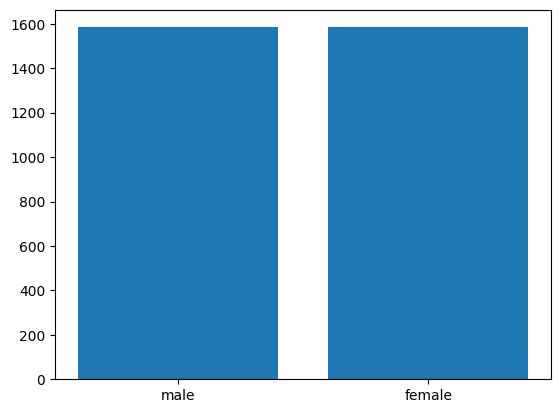

In [8]:
plt.bar(r1.index,r1.values)
plt.show()

# forming dataframe and seies

In [9]:
x=df.drop('label',axis=1)
y=df['label']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3168, 20)
(3168,)


# splitting the data to test and train the data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


# creating confussion matrix of class report

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [13]:
def eval_model(y_test,ypred):
  cm=confusion_matrix(y_test,ypred)
  print(cm)
  print('accuracy score',accuracy_score(y_test,ypred))
  print(classification_report(y_test,ypred))
def mscore(model):
  print('training score',model.score(x_train,y_train))
  print('testing score',model.score(x_test,y_test))

# solving using the **ML** **models**

# 1.logistics regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
m1=LogisticRegression(max_iter=10000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

scores and accuracy of model

In [16]:
mscore(m1)

training score 0.9123914759273876
testing score 0.8927444794952681


In [17]:
ypred_m1=m1.predict(x_test)
eval_model(y_test,ypred_m1)

[[254  56]
 [ 12 312]]
accuracy score 0.8927444794952681
              precision    recall  f1-score   support

      female       0.95      0.82      0.88       310
        male       0.85      0.96      0.90       324

    accuracy                           0.89       634
   macro avg       0.90      0.89      0.89       634
weighted avg       0.90      0.89      0.89       634



# 2.KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
m2=KNeighborsClassifier(n_neighbors=11)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

# scores and accuracy of model

In [20]:
mscore(m2)

training score 0.7616416732438832
testing score 0.7003154574132492


In [21]:
ypred_knn=m2.predict(x_test)
eval_model(y_test,ypred_knn)

[[206 104]
 [ 86 238]]
accuracy score 0.7003154574132492
              precision    recall  f1-score   support

      female       0.71      0.66      0.68       310
        male       0.70      0.73      0.71       324

    accuracy                           0.70       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.70      0.70      0.70       634



# 3.DataTree Classifiers

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
m3=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=9)
m3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9)

# scores and accuracy of model

In [24]:
mscore(m3)

training score 0.994475138121547
testing score 0.9605678233438486


In [25]:
ypred_m3=m3.predict(x_test)
eval_model(y_test,ypred_m3)

[[302   8]
 [ 17 307]]
accuracy score 0.9605678233438486
              precision    recall  f1-score   support

      female       0.95      0.97      0.96       310
        male       0.97      0.95      0.96       324

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



# 4.RF Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
m4=RandomForestClassifier(n_estimators=60,criterion='gini',max_depth=7,min_samples_split=10)
m4.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=60)

In [28]:
mscore(m4)

training score 0.9917127071823204
testing score 0.9637223974763407


# scores and accuracy of model

In [29]:
ypred_m4=m4.predict(x_test)
eval_model(y_test,ypred_m4)

[[301   9]
 [ 14 310]]
accuracy score 0.9637223974763407
              precision    recall  f1-score   support

      female       0.96      0.97      0.96       310
        male       0.97      0.96      0.96       324

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



# 5.SVC Classifier

In [30]:
from sklearn.svm import SVC

In [31]:
m5=SVC(kernel='linear',C=1)
m5.fit(x_train,y_train)

SVC(C=1, kernel='linear')

# scores and accuracy of model

In [32]:
mscore(m5)

training score 0.9273875295974744
testing score 0.9022082018927445


In [33]:
ypred_m5=m5.predict(x_test)
eval_model(y_test,ypred_m5)

[[259  51]
 [ 11 313]]
accuracy score 0.9022082018927445
              precision    recall  f1-score   support

      female       0.96      0.84      0.89       310
        male       0.86      0.97      0.91       324

    accuracy                           0.90       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.91      0.90      0.90       634



# generate confusion_matrix and classification report

In [34]:
def gen_model(model,x_test,x_train,y_test,y_train):
  model.fit(x_train,y_train)
  print('training score',model.score(x_train,y_train))
  print('testing score',model.score(x_test,y_test))
  ypred=model.predict(x_test,y_test)
  cm=confusion_matrix(y_test,ypred)
  print(cm)
  print(classification_report(y_test,ypred))

In [35]:
print(ypred_m1.shape)

(634,)


In [36]:
print(ypred_knn.shape)
print(ypred_m3.shape)
print(ypred_m4.shape)
print(ypred_m5.shape)

(634,)
(634,)
(634,)
(634,)


# testing the predicted labels

In [37]:
x_test.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [38]:
submission_test=pd.DataFrame({'Test_label':x_test['meanfreq'],'pred_label':ypred_m1})
submission_test.head(10)

,Test_label,pred_label
1093,0.195164,male
1011,0.192989,male
56,0.144858,male
516,0.152081,male
1275,0.188128,male
3119,0.217027,female
646,0.152670,female
1520,0.164680,male
2630,0.208453,female
2101,0.184568,female


# **Thank you**